# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

Introducción

El análisis de datos puede resolver muchas preguntas y dar soluciones a distintos problemas. La base de datos que usaré en este trabajo se llama: Censo y Conteo de Población y Vivienda de Sonora, en el 2020. El censo del conjunto de datos lo realizó el Instituto Nacional de Estadística, Geografía e Informática (INEGI). La base de datos fue tomada de este URL: https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_26_cpv2020_csv.zip


Explicar base de datos y variables

La base de datos contiene 16 variables, las variables son distintos indicadores de la población de Sonora. Esta base de datos contiene información hasta Marzo 2021, por lo que los datos son muy actuales. A continuación explicare cada una de las variables y cuál es su tipo.

Variables:
ENTIDAD	
NOM_ENT	
MUN	
NOM_MUN	
POBTOT	
POBFEM	
POBMAS	
POB0_14	
POB15_64	
POB65_MAS	
PROM_HNV	
PCON_DISC	
PCLIM_PMEN	
GRAPROES	
GRAPROES_F	
GRAPROES_M	
PSINDER	
PDER_SS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('basededatos_sonora.csv') 
df.head(5)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PROM_HNV,PCON_DISC,PCLIM_PMEN,GRAPROES,GRAPROES_F,GRAPROES_M,PSINDER,PDER_SS
0,26,Sonora,0,Total de la entidad Sonora,2944840,1472643,1472197,723847,1981467,236801,2.07,145473,40272,10.40,10.45,10.35,547727,2391479
1,26,Sonora,1,Aconchi,2563,1227,1336,589,1624,350,2.43,171,38,8.78,9.38,8.22,532,2026
2,26,Sonora,1,Aconchi,1650,785,865,359,1051,240,2.35,117,25,8.91,9.45,8.40,129,1518
3,26,Sonora,1,Aconchi,761,373,388,200,487,74,2.47,35,12,8.60,9.34,7.92,378,383
4,26,Sonora,1,Aconchi,23,9,14,2,12,9,4.44,4,0,8.43,8.44,8.42,1,22


In [3]:
#eliminar columnas que no usaremos
df.drop(['ENTIDAD', 'NOM_ENT','MUN','PROM_HNV',
         'GRAPROES', 'GRAPROES_F', 'GRAPROES_M'],
        axis=1,inplace=True)
#eliminar filas que no usaremos
df.drop([0],axis=0,inplace=True)
#renombrar columnas
df.rename(columns={'NOM_MUN':'MUNICIPIO'}, inplace=True)
df.head(5)

,MUNICIPIO,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PCON_DISC,PCLIM_PMEN,PSINDER,PDER_SS
1,Aconchi,2563,1227,1336,589,1624,350,171,38,532,2026
2,Aconchi,1650,785,865,359,1051,240,117,25,129,1518
3,Aconchi,761,373,388,200,487,74,35,12,378,383
4,Aconchi,23,9,14,2,12,9,4,0,1,22
5,Aconchi,118,55,63,26,67,25,14,1,23,93


In [4]:
#poner a municipio como index
df.set_index('MUNICIPIO', inplace=True)
#hacer a todos los titulos de tipo string
df.columns = list(map(str, df.columns))
df

,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PCON_DISC,PCLIM_PMEN,PSINDER,PDER_SS
MUNICIPIO,,,,,,,,,,
Aconchi,2563,1227,1336,589,1624,350,171,38,532,2026
Aconchi,1650,785,865,359,1051,240,117,25,129,1518
Aconchi,761,373,388,200,487,74,35,12,378,383
Aconchi,23,9,14,2,12,9,4,0,1,22
Aconchi,118,55,63,26,67,25,14,1,23,93
...,...,...,...,...,...,...,...,...,...,...
San Ignacio Río Muerto,162,73,89,46,105,11,2,2,17,145
San Ignacio Río Muerto,263,129,134,61,172,30,24,0,8,255
San Ignacio Río Muerto,25,9,16,1,19,5,0,1,13,12


In [5]:
#agrupar las filas por municipios
df=df.groupby(['MUNICIPIO']).sum()
print(type(df.groupby('MUNICIPIO', 
                      axis=0)))
df


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PCON_DISC,PCLIM_PMEN,PSINDER,PDER_SS
MUNICIPIO,,,,,,,,,,
Aconchi,5115,2449,2666,1176,3241,698,341,76,1063,4042
Agua Prieta,183578,92119,91459,50506,122470,10492,8066,2254,53331,129926
Alamos,49482,23942,25540,12582,30799,6095,3299,646,7804,41610
Altar,18748,9465,9283,5459,11957,1324,1071,175,6096,12637
Arivechi,2352,1165,1187,566,1412,374,194,42,484,1866
...,...,...,...,...,...,...,...,...,...,...
Tubutama,2852,1343,1509,646,1779,427,202,24,585,2267
Ures,16793,8065,8728,3300,10702,2791,1302,225,1649,15128
Villa Hidalgo,2857,1361,1496,670,1730,457,206,36,580,2271


Pregunta #1
¿Cuáles son los 5 municipios con mayor población en Sonora?


In [6]:
#Acomodamos las filas por orden ascedente
df.sort_values('POBTOT', ascending=False, axis=0, inplace=True)
df

,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PCON_DISC,PCLIM_PMEN,PSINDER,PDER_SS
MUNICIPIO,,,,,,,,,,
Hermosillo,1866846,936164,930682,441055,1288518,134318,82689,27584,331029,1530934
Cajeme,870206,442591,427615,199113,590374,80553,51485,12925,133888,735547
Nogales,529118,264853,264265,140525,361906,26529,18628,6325,94396,433748
San Luis Río Colorado,396668,196340,200328,100972,265805,29663,17521,5565,121630,274314
Navojoa,328132,165973,162159,78473,217942,31659,18089,4612,41367,286283
...,...,...,...,...,...,...,...,...,...,...
Atil,1238,627,611,262,759,217,85,10,304,934
San Javier,1060,481,579,341,622,97,42,2,286,772
Oquitoa,970,524,446,194,633,143,65,6,449,521


In [7]:
df_top5=df.head()
df_top5.head()

,POBTOT,POBFEM,POBMAS,POB0_14,POB15_64,POB65_MAS,PCON_DISC,PCLIM_PMEN,PSINDER,PDER_SS
MUNICIPIO,,,,,,,,,,
Hermosillo,1866846,936164,930682,441055,1288518,134318,82689,27584,331029,1530934
Cajeme,870206,442591,427615,199113,590374,80553,51485,12925,133888,735547
Nogales,529118,264853,264265,140525,361906,26529,18628,6325,94396,433748
San Luis Río Colorado,396668,196340,200328,100972,265805,29663,17521,5565,121630,274314
Navojoa,328132,165973,162159,78473,217942,31659,18089,4612,41367,286283


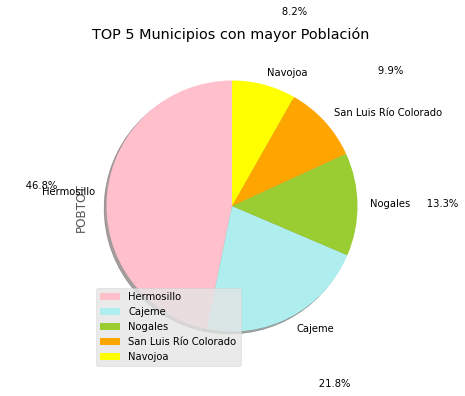

In [8]:
colors=['pink','paleturquoise','yellowgreen','orange','yellow']
df_top5['POBTOT'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%10.1f%%', # add in percentages
                            startangle=90,
                            pctdistance=1.6,# start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=colors)
plt.title('TOP 5 Municipios con mayor Población')
plt.axis('equal') # Sets the pie chart to look like a circle.plt.show()
plt.legend(labels=df_top5.index, loc='best') 
plt.show()

Pregunta #2
¿Cuál es la relación que existe entre la edad y el tener acceso a un servicio de salud en Sonora?

In [9]:
df.rename(columns={'POB0_14':'Rango1','POB15_64':'Rango2','POB65_MAS':'Rango3'}, inplace=True)

In [10]:
#POB0_14	POB15_64	POB65_MAS
model = sm.OLS.from_formula("PDER_SS ~ Rango1 + Rango2 + Rango3", data=df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PDER_SS   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.313e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          3.22e-102
Time:                        08:18:30   Log-Likelihood:                -733.98
No. Observations:                  72   AIC:                             1476.
Df Residuals:                      68   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2446    939.166     -0.009      0.993   -1882.321    1865.832
Rango1        -0.1964      0.317     -0.619      0.538      -0.830       0.437
Rango2         1.1031      0.126      8.748      0.000       0.851       1.355
Rango3         1.4826      0.292      5.069      0.000       0.899       2.066
==============================================================================
Omnibus:                       88.525   Durbin-Watson:                   2.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2296.960
Skew:                          -3.285   Prob(JB):                         0.00
Kurtosis:                      29.879   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo de regresión que obtuvimos es: 
Acceso a servicio de salud= -0.1964(RANGO 1)+1.1031(Rango 2)+ 1.4826(Rango 3)

Donde:
· Rango 1: 0-14 años
· Rango 2:15-65 años
· Rango 3: 65-mas años
    
Y el valor de R^2 es igual a 1, por lo que el modelo se ajusta bien a la situación

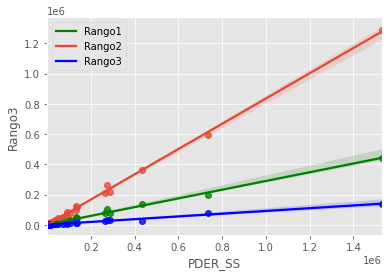

In [11]:
reg_plot = sns.regplot(x='PDER_SS', 
                       y='Rango1', 
                       data=df,color='green')
reg_plot = sns.regplot(x='PDER_SS', 
                       y='Rango2', 
                       data=df)
reg_plot = sns.regplot(x='PDER_SS', 
                       y='Rango3', 
                       data=df,
                       color='blue')
plt.legend(labels=['Rango1','Rango2','Rango3'], loc='best') 

Pregunta #3 ¿Cómo es la correlación entre contar con una discapacidad y tener una condición mental?

In [12]:
#coeficiente de correcación
cc = df[["PCON_DISC", "PCLIM_PMEN"]].corr() 
print(cc.PCON_DISC.PCLIM_PMEN)

0.9916111387188379


Esto se interpreta como una correlación fuerte y positiva, por lo que la correlación entre las variables es alta. Por lo que nos indica que es muy común que una persona con alguna capacidad diferente tienda a tener una condición mental.

Stakeholders

Las preguntas que se pueden resolver con esta base de datos son instituciones del gobierno y organismos como: DIF, Secretaría Ejecutiva del Sistema Estatal de Protección Integral de Niñas, Niños y Adolescentes, Comisión Estatal de protección contra riesgos sanitarios del Estado de Sonora, Centro Estatal de Desarrollo Municipal, Comisión de Arbitraje Médico del Estado de Sonora, entre muchos otros.


Conclusiones